In [2]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import logging
LOG_FORMAT = "%(asctime)s [%(levelname)s] %(message)s"
DATE_FORMAT = "%Y-%m-%d %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=LOG_FORMAT, datefmt=DATE_FORMAT)

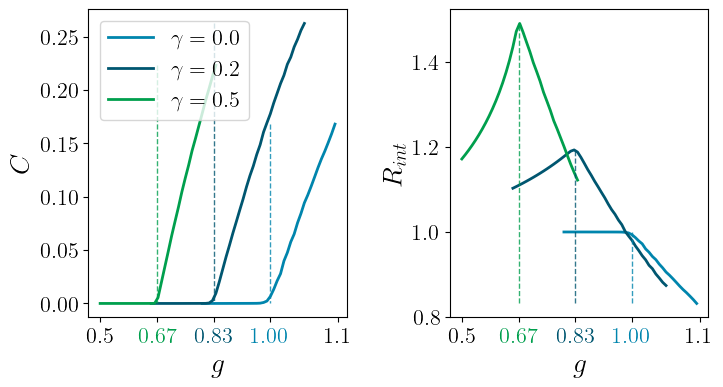

In [15]:
prefixPath = "../../../Data/results/11/a2"
etaList = [0.0, 0.2, 0.5]

bound = {
    0.0: ("0.8", "1.2"),
    0.2: ("0.65", "1.1"),
    0.5: ("0.5", "0.85"),
    0.8: ("0.4", "0.8"),
}
colorLists = ["#0085ad", "#005670", "#009f4d"]
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex="row", gridspec_kw={
    "wspace": 0.4
})

minValue = 10
for i, eta in enumerate(etaList):
    record = torch.load(prefixPath + "/dmfts-eta{}.pt".format(eta))
    gList = record["gList"]

    for j, cr in enumerate([record["C"], record["R"]]):
        ax[j].plot(gList, cr, c=colorLists[i], linewidth=2, label="$\gamma = {:.1f}$".format(eta))

        if j == 0:
            ax[j].vlines([1 / (1 + eta)], torch.max(cr), torch.min(cr), colors=colorLists[i], linewidth=1, linestyles="--", alpha=0.8)
        else:
            minValue = min(minValue, torch.min(cr).item())
        
        ax[j].tick_params(labelsize=16)
    
for i, eta in enumerate(etaList):
    record = torch.load(prefixPath + "/dmfts-eta{}.pt".format(eta))

    ax[1].vlines([1 / (1 + eta)], minValue, torch.max(record["R"]), colors=colorLists[i], linewidth=1, linestyles="--", alpha=0.8)

minG = [torch.min(torch.tensor([float(bound[eta][0]) for eta in etaList])).item()]
maxG = [torch.max(torch.tensor([float(bound[eta][1]) for eta in etaList])).item()]
gcLists = [1 / (1 + eta) for eta in etaList]
[ax[j].set_xticks(minG + gcLists + maxG, 
                  labels=[bound[etaList[-1]][0]] + [f"{gc:.2f}" for gc in gcLists] + [bound[etaList[1]][1]])
            for j in range(2)]
[[xtick.set_color(color) for xtick, color in zip(ax[j].get_xticklabels(), ["black"] + colorLists + ["black"])] for j in range(2)]

ax[0].legend(fontsize=16)

[ax[j].set_xlabel("$g$", fontsize=20) for j in range(2)]
[ax[j].set_ylabel(label, fontsize=20) for j, label in enumerate(["$C$", "$R_{int}$"])]

# plt.savefig("./fig4-dmfts2.pdf", bbox_inches="tight")
plt.show()
plt.close()